The charging session data and weather data were merged by **rounding their timestamps to the nearest hour**. The temperature values were then categorized into intervals (bins), and the number of sessions in each temperature range was counted

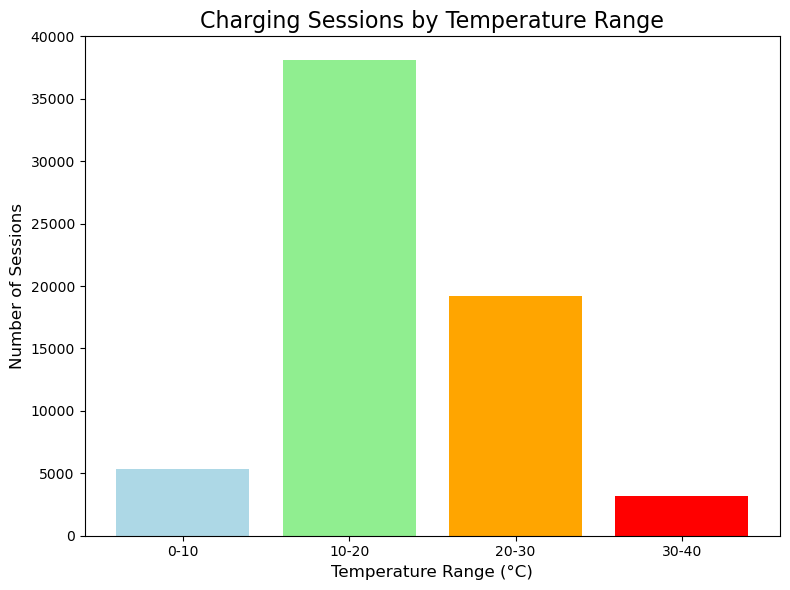

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv("../weather_cleaned.csv", encoding="ISO-8859-1")
charging = pd.read_csv("../modified_data.csv", encoding="ISO-8859-1")

charging['connectionTime'] = pd.to_datetime(charging['connectionTime'], utc=True)
weather['timestamp'] = pd.to_datetime(weather['timestamp'], utc=True)

charging['hour'] = charging['connectionTime'].dt.floor('h')

weather['hour'] = weather['timestamp'].dt.floor('h')

merged_data = pd.merge(
    charging,
    weather[['hour', 'temperature']], 
    on='hour', 
    how='inner'
)

bins = [0, 10, 20, 30, 40]
labels = ['0-10', '10-20', '20-30', '30-40']
merged_data['temp_range'] = pd.cut(merged_data['temperature'], bins=bins, labels=labels, right=False)

session_counts = merged_data['temp_range'].value_counts().sort_index()
colors = ['lightblue', 'lightgreen', 'orange', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(session_counts.index, session_counts.values, color=colors)

plt.title('Charging Sessions by Temperature Range', fontsize=16)
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.tight_layout()
plt.show()


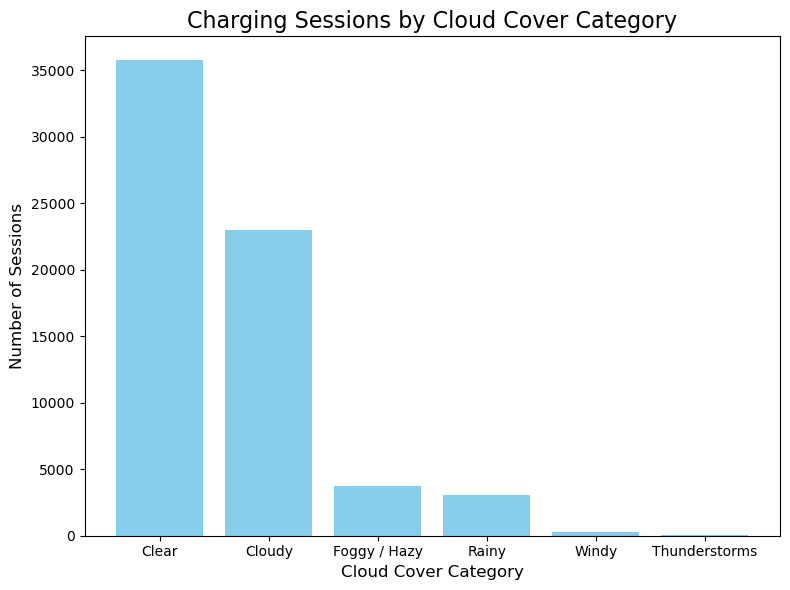

In [46]:
merged_data = pd.merge(
    charging,
    weather[['hour', 'temperature', 'cloud_cover_description']],  # Include 'cloud_cover_description' here
    on='hour', 
    how='inner'
)

# Define the groups for cloud cover descriptions
cloud_cover_groups = {
    'Clear': ['Fair'],  # Add 'Partly Cloudy' here
    'Cloudy': ['Mostly Cloudy', 'Cloudy', 'Cloudy / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy'],
    'Rainy': ['Light Rain', 'Rain', 'Heavy Rain', 'Heavy Rain / Windy', 
              'Light Rain / Windy', 'Rain / Windy', 'Light Rain with Thunder'],
    'Thunderstorms': ['T-Storm', 'Heavy T-Storm', 'Thunder', 'Thunder in the Vicinity'],
    'Windy': ['Fair / Windy', 'Partly Cloudy / Windy', 'Cloudy / Windy', 
              'Mostly Cloudy / Windy', 'Rain / Windy', 'Blowing Dust'],
    'Foggy / Hazy': ['Haze', 'Fog', 'Smoke']
}

# Function to categorize cloud cover descriptions
def categorize_cloud_cover(description):
    for category, conditions in cloud_cover_groups.items():
        if description in conditions:
            return category
    return 'Other'  

# Apply categorization to the 'cloud_cover_description' column
merged_data['cloud_cover_category'] = merged_data['cloud_cover_description'].apply(categorize_cloud_cover)

# Count the number of sessions per cloud cover category
session_counts = merged_data['cloud_cover_category'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(session_counts.index, session_counts.values, color='skyblue')

# Add titles and labels
plt.title('Charging Sessions by Cloud Cover Category', fontsize=16)
plt.xlabel('Cloud Cover Category', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


We see that clear weather conditions cause the most demand, followed by cloudy weather

In [47]:
print(weather['cloud_cover_description'].unique())

['Fair' 'Haze' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Fog' 'Light Rain'
 'Rain' 'Heavy Rain' 'Heavy Rain / Windy' 'Light Rain / Windy' 'T-Storm'
 'Fair / Windy' 'Cloudy / Windy' 'Mostly Cloudy / Windy'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'Thunder' 'Smoke'
 'Light Rain with Thunder' 'Heavy T-Storm' 'Rain / Windy' 'Blowing Dust']
